# **Informe Laboratorio 3**

Integrantes:

- Guillermo Mejía Uribe c.c. 1037643854
- Victor Restrepo c.c. 1017270327

Enlace del video:

- [video_youtube](https://youtu.be/EpClkLBLx_g)

# **Sección 1: Análisis de π**

Este código organiza los resultados experimentales en un DataFrame, calcula automáticamente speedup y eficiencia y los deja listos para análisis reproducibles. Facilita comparar configuraciones de hilos de forma ordenada y exportar la información a otros formatos como CSV.

In [ ]:
"""
Construcción del DataFrame con los resultados de rendimiento
del cálculo de pi (versión secuencial vs paralela con Pthreads).

Incluye el cálculo de:
- speedup  = tiempo_secuencial / tiempo_paralelo
- eficiencia = speedup / número_de_hilos
"""

from dataclasses import dataclass
from typing import List

import pandas as pd


@dataclass
class ResultadoPiParalelo:
    """
    Representa una medición de tiempo para una ejecución paralela de pi.

    Atributos:
        hilos: número de hilos utilizados (H).
        tiempo_paralelo: tiempo medido de ejecución en segundos (Tp).
    """
    hilos: int
    tiempo_paralelo: float


def construir_dataframe_resultados(
    tiempo_secuencial: float,
    resultados_paralelos: List[ResultadoPiParalelo],
) -> pd.DataFrame:
    """
    Construye un DataFrame de pandas a partir de los tiempos medidos.

    El DataFrame incluirá las columnas:
      - hilos
      - tiempo_secuencial
      - tiempo_paralelo
      - speedup
      - eficiencia

    Args:
        tiempo_secuencial: tiempo de ejecución de la versión secuencial (Tsec).
        resultados_paralelos: lista de resultados de ejecuciones paralelas.

    Returns:
        DataFrame con una fila por cada configuración de hilos.
    """
    filas = []

    for resultado in resultados_paralelos:
        speedup = tiempo_secuencial / resultado.tiempo_paralelo
        eficiencia = speedup / resultado.hilos

        filas.append(
            {
                "hilos": resultado.hilos,
                "tiempo_secuencial (s)": tiempo_secuencial,
                "tiempo_paralelo (s)": resultado.tiempo_paralelo,
                "speedup (𝑇𝑠/𝑇𝑝)": speedup,
                "eficiencia (speedup/ N)": eficiencia,
            }
        )

    df_resultados = pd.DataFrame(filas)
    df_resultados = df_resultados.sort_values(by="hilos").reset_index(drop=True)
    return df_resultados


# -------------------------------------------------------------------------
# Uso directo en el notebook (puedes modificar estos valores si repites pruebas)
# -------------------------------------------------------------------------

# Tiempo secuencial medido (./pi 2000000000)
tiempo_secuencial = 2.403384

# Resultados de tus pruebas con ./pi_p H 2000000000
resultados_paralelos = [
    ResultadoPiParalelo(hilos=1, tiempo_paralelo=2.438415),
    ResultadoPiParalelo(hilos=2, tiempo_paralelo=1.222977),
    ResultadoPiParalelo(hilos=3, tiempo_paralelo=0.816496),
    ResultadoPiParalelo(hilos=4, tiempo_paralelo=0.614532),
    ResultadoPiParalelo(hilos=5, tiempo_paralelo=0.489749),
    ResultadoPiParalelo(hilos=6, tiempo_paralelo=0.418543),
    ResultadoPiParalelo(hilos=7, tiempo_paralelo=0.530768),
    ResultadoPiParalelo(hilos=8, tiempo_paralelo=0.462352),
    ResultadoPiParalelo(hilos=9, tiempo_paralelo=0.418112),
    ResultadoPiParalelo(hilos=10, tiempo_paralelo=0.431127),
    ResultadoPiParalelo(hilos=11, tiempo_paralelo=0.427121),
    ResultadoPiParalelo(hilos=12, tiempo_paralelo=0.413070),
    ResultadoPiParalelo(hilos=13, tiempo_paralelo=0.423101),
    ResultadoPiParalelo(hilos=14, tiempo_paralelo=0.444698),
    ResultadoPiParalelo(hilos=15, tiempo_paralelo=0.423101),
    ResultadoPiParalelo(hilos=16, tiempo_paralelo=0.430941),
    ResultadoPiParalelo(hilos=17, tiempo_paralelo=0.423101),
    ResultadoPiParalelo(hilos=18, tiempo_paralelo=0.428562),
]

# Construir el DataFrame
df_resultados = construir_dataframe_resultados(
    tiempo_secuencial=tiempo_secuencial,
    resultados_paralelos=resultados_paralelos,
)

# Mostrar el DataFrame en Colab
df_resultados

,hilos,tiempo_secuencial (s),tiempo_paralelo (s),speedup (𝑇𝑠/𝑇𝑝),eficiencia (speedup/ N)
0,1,2.403384,2.438415,0.985634,0.985634
1,2,2.403384,1.222977,1.965191,0.982596
2,3,2.403384,0.816496,2.943534,0.981178
3,4,2.403384,0.614532,3.910918,0.977729
4,5,2.403384,0.489749,4.907379,0.981476
5,6,2.403384,0.418543,5.742263,0.957044
6,7,2.403384,0.530768,4.528125,0.646875
7,8,2.403384,0.462352,5.198169,0.649771
8,9,2.403384,0.418112,5.748182,0.638687
9,10,2.403384,0.431127,5.574654,0.557465


Este código genera gráficas claras de tiempo y speedup en función de los hilos, visualizando el impacto real del paralelismo. Permite identificar zonas de buen escalamiento, saturación y sobrecarga, reforzando la interpretación teórica con evidencia empírica.

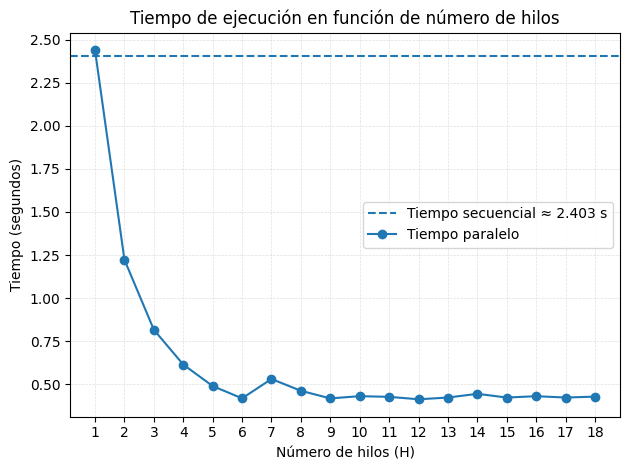

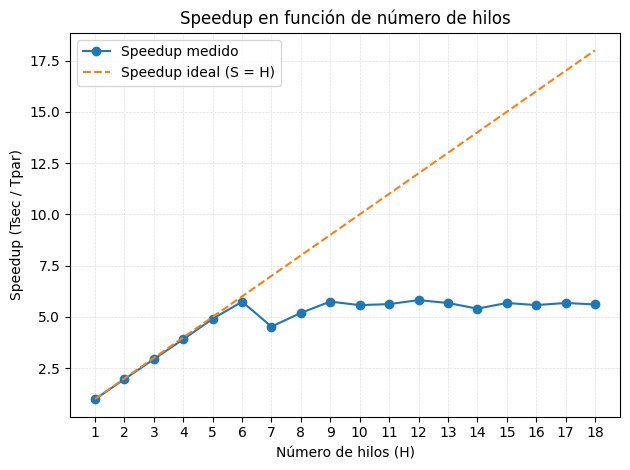

In [ ]:
"""
Generación de gráficas de comparación de rendimiento para el cálculo de pi.

Se generan dos gráficos:
  1. Tiempo de ejecución vs número de hilos.
  2. Speedup vs número de hilos (incluye línea de speedup ideal S = H).
"""

import matplotlib.pyplot as plt


def graficar_tiempo_vs_hilos(df_resultados):
    """
    Genera una gráfica de tiempos de ejecución vs. número de hilos.

    Muestra:
      - Una línea horizontal con el tiempo secuencial.
      - Una curva con el tiempo paralelo en función del número de hilos.

    Args:
        df_resultados: DataFrame con las columnas:
            'hilos', 'tiempo_secuencial', 'tiempo_paralelo'.
    """
    df_ordenado = df_resultados.sort_values(by="hilos")

    hilos = df_ordenado["hilos"]
    tiempo_paralelo = df_ordenado["tiempo_paralelo"]
    tiempo_secuencial = df_ordenado["tiempo_secuencial"].iloc[0]

    plt.figure()
    plt.title("Tiempo de ejecución en función de número de hilos")
    plt.xlabel("Número de hilos (H)")
    plt.ylabel("Tiempo (segundos)")

    # Línea horizontal: referencia del tiempo secuencial
    plt.axhline(
        y=tiempo_secuencial,
        linestyle="--",
        label=f"Tiempo secuencial ≈ {tiempo_secuencial:.3f} s",
    )

    # Curva de tiempo paralelo
    plt.plot(
        hilos,
        tiempo_paralelo,
        marker="o",
        label="Tiempo paralelo",
    )

    plt.xticks(hilos)
    plt.legend()
    plt.grid(True, color='lightgray', linestyle="--", linewidth=0.5, alpha=0.7)
    plt.tight_layout()
    plt.show()


def graficar_speedup_vs_hilos(df_resultados):
    """
    Genera una gráfica de speedup vs. número de hilos.

    Muestra:
      - Curva del speedup medido.
      - Línea del speedup ideal (S = H).

    Args:
        df_resultados: DataFrame con las columnas:
            'hilos', 'speedup'.
    """
    df_ordenado = df_resultados.sort_values(by="hilos")

    hilos = df_ordenado["hilos"]
    speedup = df_ordenado["speedup"]

    plt.figure()
    plt.title("Speedup en función de número de hilos")
    plt.xlabel("Número de hilos (H)")
    plt.ylabel("Speedup (Tsec / Tpar)")

    # Speedup medido
    plt.plot(
        hilos,
        speedup,
        marker="o",
        label="Speedup medido",
    )

    # Speedup ideal (S = H)
    plt.plot(
        hilos,
        hilos,
        linestyle="--",
        label="Speedup ideal (S = H)",
    )

    plt.xticks(hilos)
    plt.legend()
    plt.grid(True, color='lightgray', linestyle="--", linewidth=0.5, alpha=0.7)
    plt.tight_layout()
    plt.show()


# -------------------------------------------------------------------------
# Imprimir gráficas
# -------------------------------------------------------------------------

graficar_tiempo_vs_hilos(df_resultados)
graficar_speedup_vs_hilos(df_resultados)

### **Análisis de Resultados**

- **Comparación entre 𝑇𝑝(1) y 𝑇𝑠:**

    En el DataFrame se observa que​ el tiempo secuencial 𝑇𝑠 es aproximadamente de 2.403 s, mientras que el tiempo paralelo para un hilo 𝑇𝑝(1) es aproximadamente de 2.438 s. Es decir, con un solo hilo la versión paralela es ligeramente más lenta. La discrepancia se explica por el overhead de crear el hilo, pasar la estructura de datos y hacer pthread_join, trabajo extra que la versión secuencial no realiza.

- **Speedup máximo y relación con los núcleos físicos:**

    El Speedup máximo medido es cercano a 5.8 (para 12 hilos), es decir, la versión paralela tarda casi una sexta parte del tiempo de la versión secuencial. El procesador tiene 6 núcleos físicos y 12 hilos lógicos, de modo que el resultado se aproxima más al número de núcleos físicos. Aun así, eel rendimiento queda por debajo del ideal teórico debido a la fracción secuencial del código y al overhead de gestión de hilos.

- **Tendencia de la eficiencia al incrementar el número de hilos:**

    En el DataFrame, la eficiencia es cercana a 1 (≈ 0.95 – 0.98) para 2–6 hilos y luego decrece conforme aumenta 𝐻. Las gráficas muestran que, a partir de ese punto, el tiempo apenas mejora y el Speedup se satura. Esta caída se debe a que el trabajo total es fijo y el costo de coordinar más hilos (creación, planificación, cambios de contexto y límites de memoria/CPU) empieza a dominar; además, al superar el número de hilos de hardware se produce sobre-suscripción y los hilos compiten por los mismos recursos físicos.


# **Sección 2: Análisis de Fibonacci**

### **1. Resultados de Ejecución**

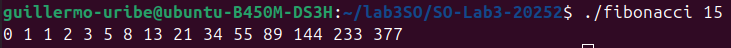

### **2. Análisis del Diseño**

**Mecanismo utilizado para transferir datos:**

- Para transferir los datos al hilo trabajador, el programa encapsula el puntero al arreglo y el valor de N dentro de la estructura ArgumentosFibonacci. El hilo principal reserva esta estructura en memoria dinámica, la inicializa y pasa su dirección a pthread_create como argumento genérico void *. El hilo trabajador castea ese puntero de vuelta a ArgumentosFibonacci * y, a través de él, accede tanto al arreglo compartido como al tamaño de la secuencia que debe generar.

**Rol de pthread_join:**

- pthread_join actúa como el mecanismo de sincronización entre el hilo principal y el hilo trabajador. El hilo principal se bloquea en la llamada a pthread_join hasta que el hilo trabajador termina de llenar el arreglo con los valores de Fibonacci. Solo después de que pthread_join retorna, main continúa la ejecución e imprime la secuencia, garantizando que no se lea memoria parcialmente escrita ni resultados incompletos.